In [42]:
# Import Libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split

In [30]:
#Load Dataset
train_df = pd.read_csv('/kaggle/input/intelligence-sig-NLP-Task/news_train.csv')
test_df = pd.read_csv('/kaggle/input/intelligence-sig-NLP-Task/test.csv')

In [31]:
#Explore the Data
print("Training Data Preview:\n", train_df.head())
print("Test Data Preview:\n", test_df.head())

Training Data Preview:
    ID                                         News_title  \
0   1  Do men enjoy sex more, or women? The Mahabhara...   
1   2       Why you should eat the Demonetisation laddoo   
2   3            Is the world headed for a new Cold War?   
3   4  Demonetisation is all about Modi, either you'r...   
4   5  Why electoral bonds won't clean up political f...   

                                       News_headline  Category  
0  [Book Extract] From Anushasana Parva, translat...      Arts  
1  One laddoo equals to one lakh in your Jan Dhan...    humour  
2  The battle lines have become very clear with R...  politics  
3  How many times should this hypocritical drama ...  business  
4  Union finance minister Arun Jaitley needs to p...  politics  
Test Data Preview:
    ID                                         News_title  \
0   1  How Blockchain can usher land reforms in the c...   
1   2  What Kamal Nath as president means for Congres...   
2   3  Why BJP's sweep in

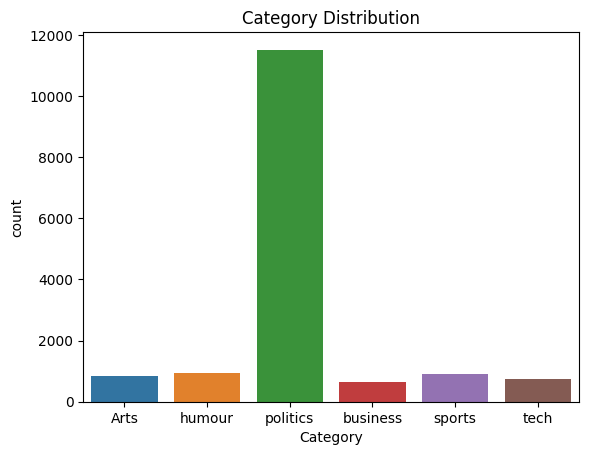

In [32]:
# Visualize Category Distribution
sns.countplot(x='Category', data=train_df)
plt.title('Category Distribution')
plt.show()

In [44]:
# Assuming train_df is your training DataFrame and has the required columns
# Combine the text fields for feature extraction
train_df['combined_text'] = train_df['News_title'].fillna('') + ' ' + train_df['News_headline'].fillna('')

In [45]:
# Remove NaN values from 'Category' column (target variable)
train_df = train_df[~train_df['Category'].isna()]
print("Number of NaN values in 'Category' after cleanup:", train_df['Category'].isna().sum())


Number of NaN values in 'Category' after cleanup: 0


In [46]:
X = train_df['combined_text']
y = train_df['Category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Convert Text into Numerical Features using TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)


In [52]:
# Ensure there are no NaN values in the training and validation targets
print("Check for NaN in y_train after cleanup:", pd.Series(y_train).isna().sum())
print("Check for NaN in y_val after cleanup:", pd.Series(y_val).isna().sum())


Check for NaN in y_train after cleanup: 0
Check for NaN in y_val after cleanup: 0


In [53]:
# Model Training - Using Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_tfidf, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [54]:
# Model Evaluation on the Validation Set
y_pred_val = rf_model.predict(X_val_tfidf)
print("Classification Report:\n", classification_report(y_val, y_pred_val))
print("Weighted F1 Score:", f1_score(y_val, y_pred_val, average='weighted'))

Classification Report:
               precision    recall  f1-score   support

        Arts       0.55      0.42      0.48       165
    business       0.55      0.28      0.37       134
      humour       0.49      0.17      0.26       178
    politics       0.85      0.96      0.90      2312
      sports       0.84      0.71      0.77       198
        tech       0.83      0.62      0.71       129

    accuracy                           0.83      3116
   macro avg       0.69      0.53      0.58      3116
weighted avg       0.80      0.83      0.80      3116

Weighted F1 Score: 0.8044700884738101


In [57]:
# Predict the Categories for the Test Data
test_predictions = rf_model.predict(X_test_tfidf)


In [58]:
# Create the Submission DataFrame
# Mapping Categories to Numerical Labels
category_mapping = {
    'arts': 0,
    'business': 1,
    'humor': 2,
    'politics': 3,
    'sports': 4,
    'tech': 5
}

In [64]:
# Step 7: Reverse Mapping of Predicted Labels to Category Names
reverse_category_mapping = {v: k for k, v in category_mapping.items()}
test_predictions_mapped = [reverse_category_mapping[pred] for pred in test_predictions]


In [67]:
submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'Category': [category_mapping[cat] for cat in test_predictions_mapped]
})

# Save the submission file
submission_df.to_csv('news_classification_submission1.csv', index=False)
print("Submission file created successfully !")


Submission file created successfully !
